__Copyright 2017 Igor Vustianiuk__

In [1]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage import gaussian_laplace
from skimage.feature import canny
from skimage.filters import sobel, prewitt
from skimage import color
from skimage import io

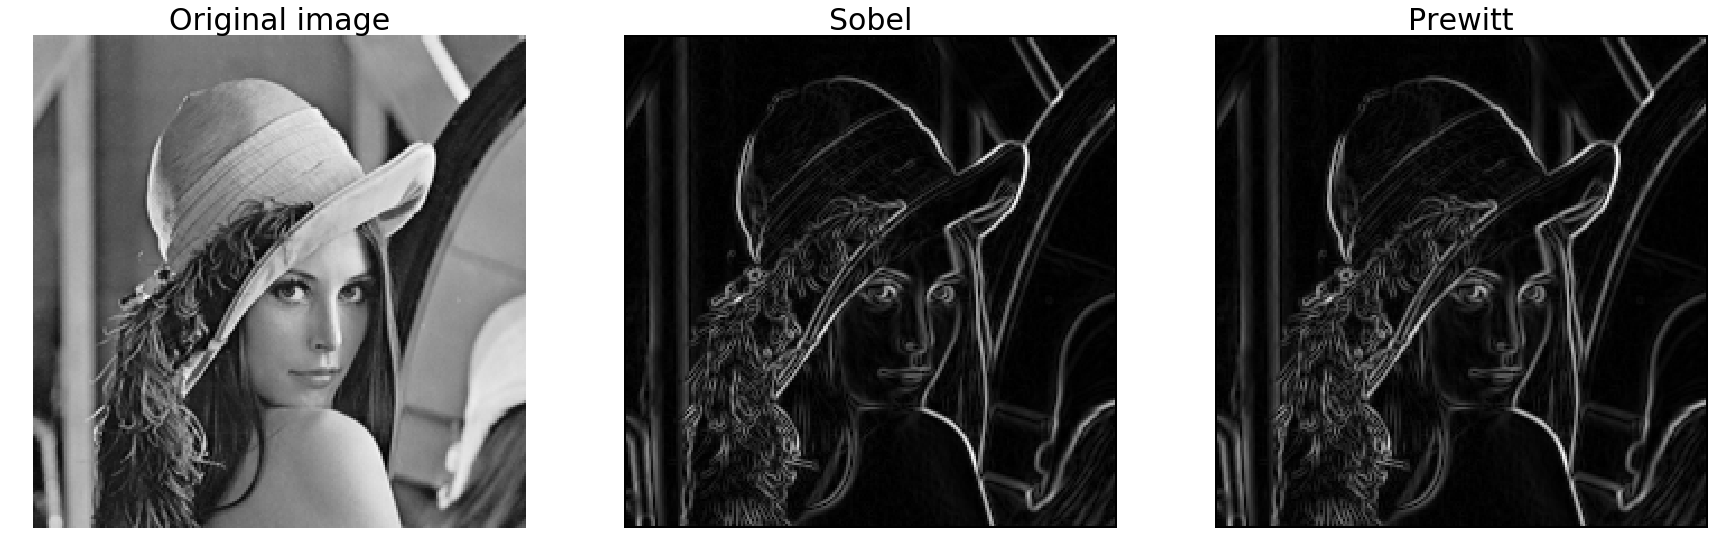

In [2]:
image = color.rgb2gray(io.imread('lena.png'))
#image = mpimg.imread('barbara.png')

fig, ax = plt.subplots(1, 3, figsize = (30, 20))

ax[0].imshow(image, cmap = 'gray')
ax[0].set_title('Original image', fontsize=30)
ax[0].axis('off')

ax[1].imshow(sobel(image), cmap = 'gray')
ax[1].set_title('Sobel', fontsize=30)
ax[1].axis('off')

ax[2].imshow(prewitt(image), cmap = 'gray')
ax[2].set_title('Prewitt', fontsize=30)
ax[2].axis('off');

In [3]:
log_result = np.zeros(image.shape)
def f(s1, s2):
    gaussian_laplace(image, [s1, s2], log_result)
    plt.imshow(log_result, cmap = 'gray')
    plt.title('LoG, s1 = {}, s2 = {}'.format(s1, s2)) #, fontsize=45)
    plt.axis('off')
    plt.show()
interact(f, s1 = (0,5,0.5), s2 = (0,5,0.5));

interactive(children=(FloatSlider(value=2.0, description='s1', max=5.0, step=0.5), FloatSlider(value=2.0, description='s2', max=5.0, step=0.5), Output()), _dom_classes=('widget-interact',))

In [4]:
def f(s):
    plt.imshow(canny(image, sigma=s), cmap = 'gray')
    plt.title('LoG, s = {}'.format(s)) #, fontsize=45)
    plt.axis('off')
interact(f, s = (0,2,0.2));
#np.finfo(image.dtype)

interactive(children=(FloatSlider(value=1.0, description='s', max=2.0, step=0.2), Output()), _dom_classes=('widget-interact',))